In [ ]:
import os
import sys
import glob
from tqdm import tqdm

import numpy as np
import pandas as pd
import torch
import nibabel as nib
from nilearn.plotting import *
from nilearn import image

In [2]:
import imp

import data_processor
imp.reload(data_processor)
import utils.visualization_tools as visualization_tools
imp.reload(visualization_tools)
from utils.visualization_tools import *

## 0. Testing data loading for `Segmentation`

### 0.1 Dataset with FCD patients, data with `bb` segmented lesions - in `mask_path`.

In [47]:
pirogov_bb_data = data_processor.DataMriSegmentation(sample='pirogov', mask='bb', prefix='fcd', ignore_missing=True,
                         coord_min=(30,30,30, ), img_shape=(192, 192, 192, ),
                         mask_path='../../datasets/fcd_classification_bank/masks/bb',
                         image_path= '../../datasets/fcd_classification_bank',
                         targets_path= 'targets/targets_fcd_bank.csv')

print('\n')
print(f'Dataset size: {len(pirogov_bb_data)}')
print(f'Labels distribution: {np.unique(pirogov_bb_data.target, return_counts=True)}\n')

#Example of data 
img, seg = pirogov_bb_data[1]
print("Image shape: {}".format(img.shape))
print("Segmentation shape: {}".format(seg.shape))

  7%|▋         | 1/15 [00:00<00:01,  9.61it/s]

Assembling data for: pirogov sample.


100%|██████████| 15/15 [00:01<00:00, 12.34it/s]




Dataset size: 15
Labels distribution: (array([1]), array([15]))

Image shape: torch.Size([1, 192, 192, 192])
Segmentation shape: torch.Size([1, 192, 192, 192])


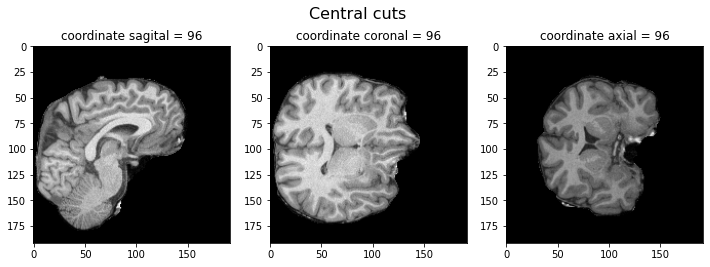

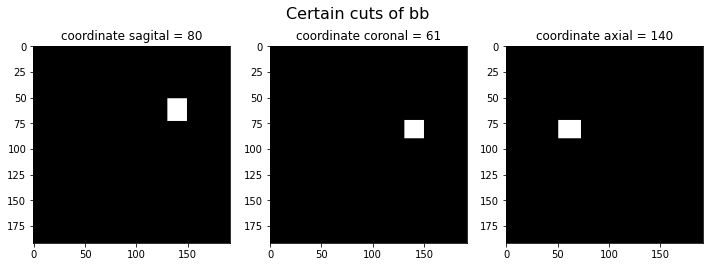

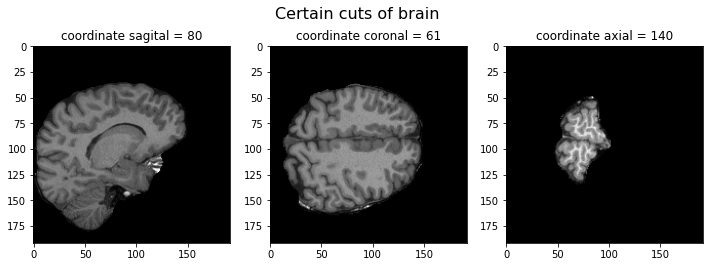

In [48]:
plot_central_cuts(img)
plot_certain_cuts(seg, get_center_coord_of_bb(seg), 'bb')
plot_certain_cuts(img, get_center_coord_of_bb(seg), 'brain')

### 0.2 Dataset with FCD patient with `mri negative` lesions, to be predicted.

In [85]:
no_fcd_pirogov_seg_data = data_processor.DataMriSegmentation(sample='pirogov', prefix='no_fcd', mask='seg', ignore_missing=True,
                         coord_min=(30,30,30, ), img_shape=(192, 192, 192, ),
                         image_path= '../../datasets/fcd_classification_bank',
                         targets_path= 'targets/targets_fcd_bank.csv')

print('\n')
print(f'Dataset size: {len(no_fcd_pirogov_seg_data)}')
print(f'Labels distribution: {np.unique(no_fcd_pirogov_seg_data.target, return_counts=True)}\n')

#Example of data 
img, seg = no_fcd_pirogov_seg_data[1]
print("Image shape: {}".format(img.shape))
print("Segmentation shape: {}".format(seg.shape))

  0%|          | 0/15 [00:00<?, ?it/s]

Assembling data for: pirogov sample.


100%|██████████| 15/15 [00:01<00:00, 12.44it/s]




Dataset size: 14
Labels distribution: (array([1]), array([14]))

Image shape: torch.Size([1, 192, 192, 192])
Segmentation shape: torch.Size([1, 192, 192, 192])


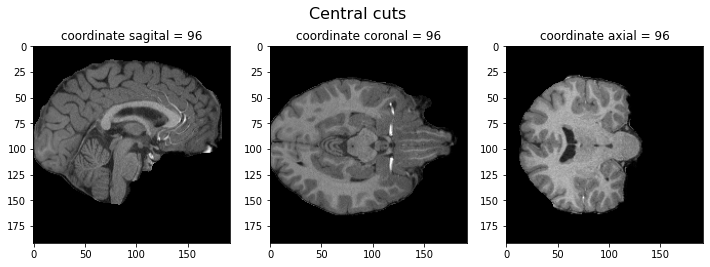

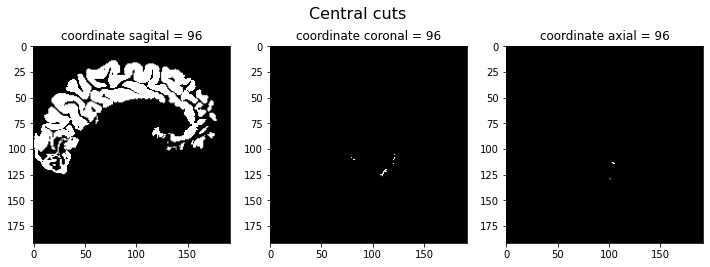

In [58]:
plot_central_cuts(img)
plot_central_cuts(seg)

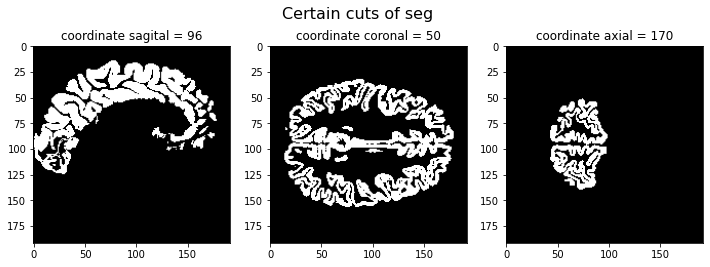

In [84]:
plot_certain_cuts(seg, (96, 50, 170), 'seg')

In [88]:
no_fcd_pirogov_seg_data.img_files.loc[1]

'../../datasets/fcd_classification_bank/no_fcd_1_1_norm.nii.gz'

In [90]:
no_fcd_pirogov_seg_data.img_seg.loc[1]

'../../datasets/fcd_classification_bank/no_fcd_1_1_aparc+aseg.nii.gz'

In [3]:
# img = nib.load('../../datasets/fcd_classification_bank/no_fcd_1_1_norm.nii.gz')
# seg = nib.load('../../datasets/fcd_classification_bank/no_fcd_1_1_aparc+aseg.nii.gz')
img = image.load_img('../../datasets/fcd_classification_bank/no_fcd_1_1_norm.nii.gz', None)
seg = image.load_img('../../datasets/fcd_classification_bank/no_fcd_1_1_aparc+aseg.nii.gz', None)

In [4]:
plot_stat_map(seg, img)

ValueError: Image size of 539x1371273 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 525.6x187.2 with 5 Axes>

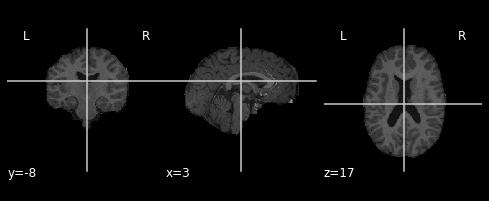

In [120]:
plot_anat(img)

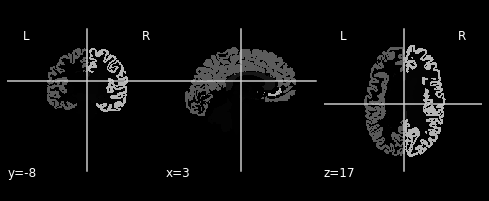

In [128]:
plot_anat(seg, (3, -8, 17))